In [3]:
from __future__ import division
from __future__ import print_function

%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import sys
from timeit import default_timer as timer

sys.path.append('/Users/alex/Documents/proteomics/synthetic_proteomics/analysis/gslr/')
import gslr

In [4]:
d = 10
c = 2
n = 100
W_star = np.zeros((c, d))
W_star[0, 1] = -0.3
W_star[0, 3] = 1.2
W_star[0, 5] = 1.0
W_star[0, 6] = 0.2
W_star[0, 9] = -0.1
W_star[1, :] = -W_star[0, :]

edges = np.transpose(np.vstack([np.arange(d - 1), np.arange(d - 1) + 1]))
root = -1
num_clusters = 1
pruning = 'strong'

graph_opts = gslr.GraphOptions(edges=edges, root=root, num_clusters=num_clusters, pruning=pruning)

X = np.random.randn(n, d)
y = np.argmax(np.dot(X, np.transpose(W_star)), axis=1)
W0 = np.zeros((c, d))

Train accuracy: 0.94
Accuracy of W_star: 0.94


<IPython.core.display.Javascript object>


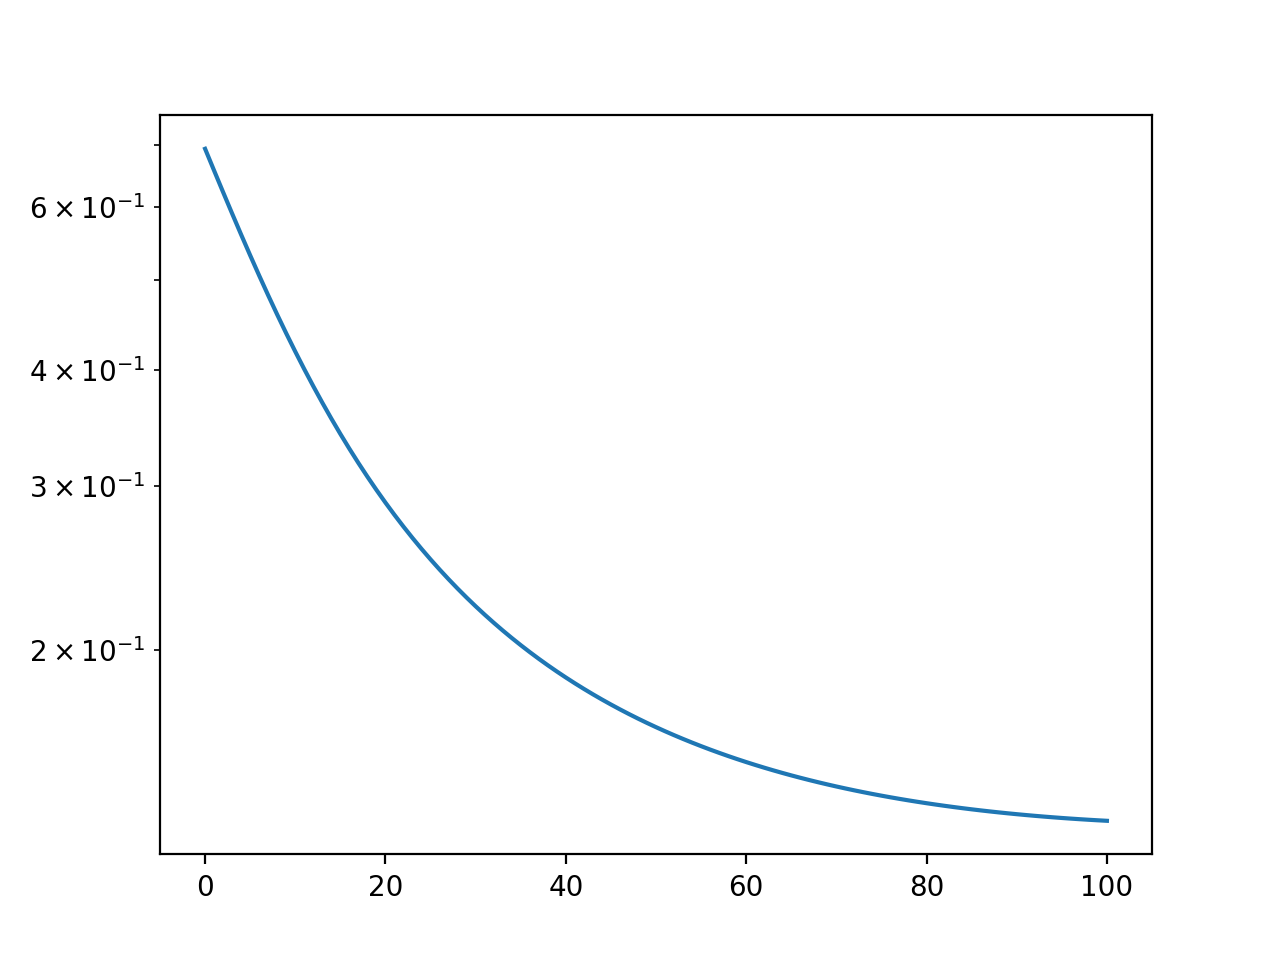

In [5]:
sparsity_low = 2
sparsity_high = 4

verbosity_level = 0

num_steps = 100
possible_steps = np.array([0.1, 0.01, 0.001, 0.0001])
steps = np.tile(possible_steps, (num_steps, 1))

W_hat, losses = gslr.gslr(X, y, W0, sparsity_low, sparsity_high, graph_opts, steps, verbosity_level)

yhat = gslr.predict(X, W_hat)
num_cor = gslr.num_correct(y, yhat)
print('Train accuracy: {}'.format(num_cor / float(n)))

yhat_star = gslr.predict(X, W_star)
num_cor_star = gslr.num_correct(y, yhat_star)
print('Accuracy of W_star: {}'.format(num_cor / float(n)))

plt.plot(losses)
plt.yscale('log')

In [6]:
W_hat

array([[ 0.        , -0.        ,  0.        ,  3.27207389, -0.11123192,
         2.84181633,  0.        , -0.        , -0.        , -0.        ],
       [-0.        ,  0.        , -0.        , -3.27207389,  0.11123192,
        -2.84181633, -0.        ,  0.        ,  0.        ,  0.        ]])

In [7]:
W_star

array([[ 0. , -0.3,  0. ,  1.2,  0. ,  1. ,  0.2,  0. ,  0. , -0.1],
       [-0. ,  0.3, -0. , -1.2, -0. , -1. , -0.2, -0. , -0. ,  0.1]])

<IPython.core.display.Javascript object>


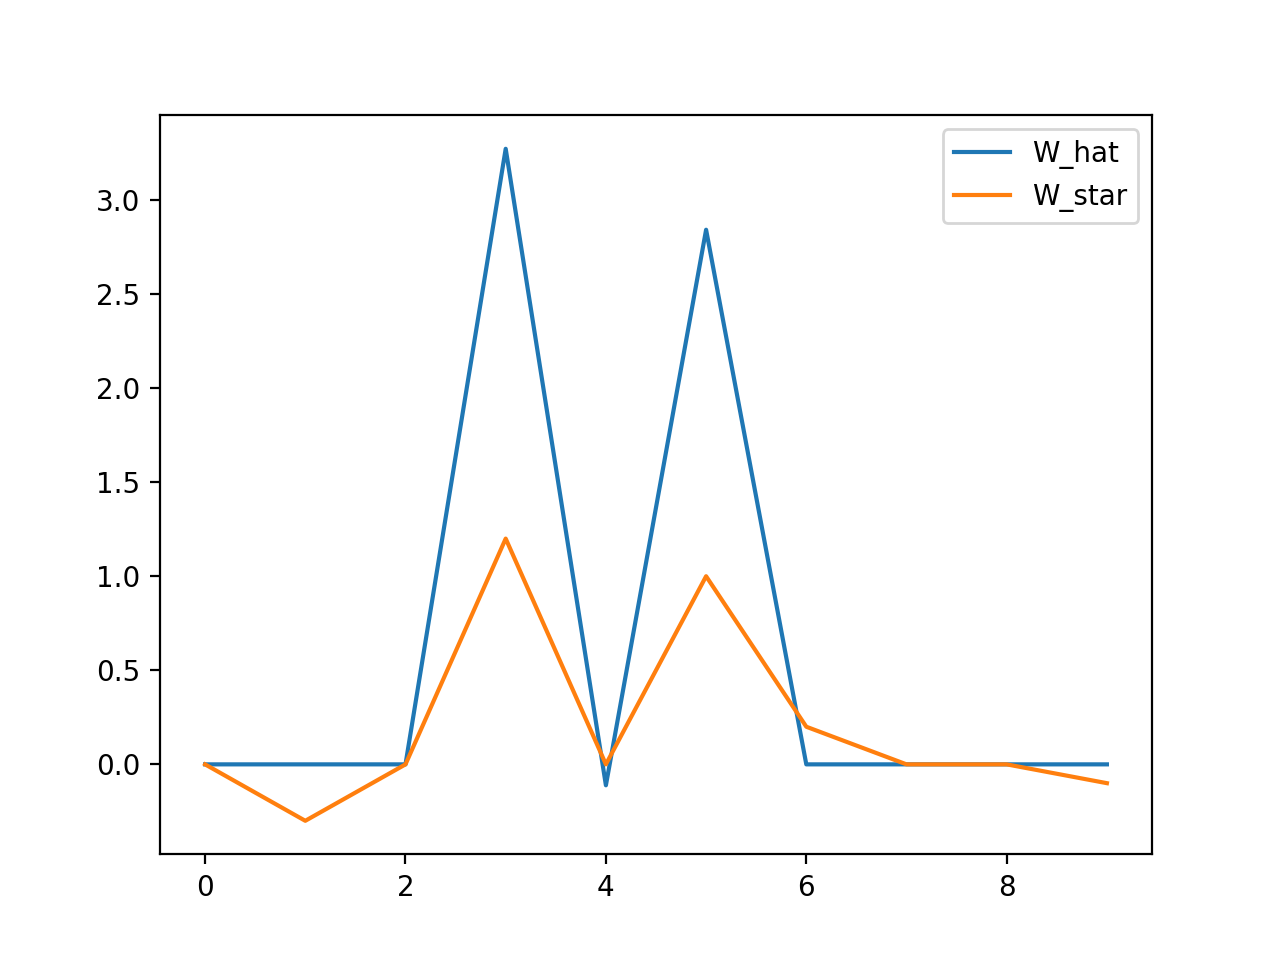

In [8]:
plt.figure()
plt.plot(W_hat[0,:], label='W_hat')
plt.plot(W_star[0,:], label='W_star')
plt.legend()